# AP(P)3RO PROJECT #

### Projet de deneigement intelligent de Montréal, Canada ###

#### M. Le Gras, A. Naullet, A. Calixte, P. Beaunieux ####

In [8]:
import multiprocessing as mp

import numpy as np
import osmnx as ox
from copy import copy

## Cartographie de la ville par le drone ##

<h4>Rappel Objectif:</h4> 
Calcul du parcours de toute la ville par un drone.

Ceci s'apparente donc au calcul d'un chemin Eulerien du graphe correspondand à la ville de Montréal

In [9]:
place = "Montreal, Canada" 
G = ox.graph_from_place(place, network_type="walk")

In [10]:
print("There is", len(G.edges), "streets in this city")
print("There is", len(G.nodes), "nodes for this city")

There is 176266 streets in this city
There is 56663 nodes for this city


In [13]:
G1 = ox.truncate.truncate_graph_dist(G,8753159525,max_dist=8000) #C
G2 = ox.truncate.truncate_graph_dist(G,300155692,max_dist=6000) #L
G3 = ox.truncate.truncate_graph_dist(G,1364932818,max_dist=3300) #F
G4 = ox.truncate.truncate_graph_dist(G,32675009,max_dist=5800) #D
G5 = ox.truncate.truncate_graph_dist(G,213784080,max_dist=3400) #G
G6 = ox.truncate.truncate_graph_dist(G,246285242,max_dist=5000) #I
G7 = ox.truncate.truncate_graph_dist(G,26234647,max_dist=5000) #Ile
G8 = ox.truncate.truncate_graph_dist(G,588566218,max_dist=6000) #B
G9 = ox.truncate.truncate_graph_dist(G,8586746933,max_dist=11000) #A
G10 = ox.truncate.truncate_graph_dist(G,583470197,max_dist=5700) #K
G11 = ox.truncate.truncate_graph_dist(G,31630568,max_dist=3200) # J
G12 = ox.truncate.truncate_graph_dist(G,294966935,max_dist=10200) #M
G13 = ox.truncate.truncate_graph_dist(G,29784717,max_dist=3400) #Donut
G14 = ox.truncate.truncate_graph_dist(G,310090260,max_dist=2600) #mid
G15 = ox.truncate.truncate_graph_dist(G,258812508,max_dist=6500) #orel_zone

In [14]:
GRAPHS_LIST = [G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,G13,G14, G15]

### 1.1: Importation des plans de la ville ###

Montréal:


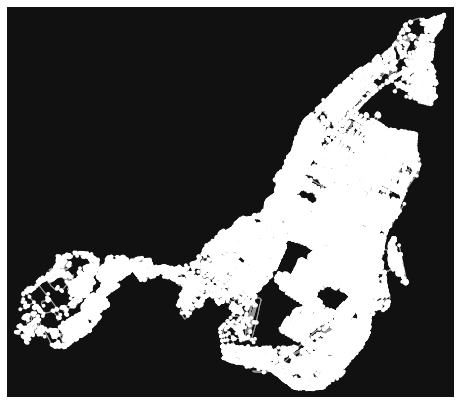

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [1155]:
print("Montréal:")
ox.plot_graph(G)

### Séparation en sous-parties

Le calcul du chemin Eulerien d'une ville aussi grande que Montréal serait vraiment très long, de plus on considère qu'un seul drone mettrai beaucoup trop de temps a parcourir la ville.

En effet, il faudrait que le drone parcours une distance de minimum ...

In [28]:
Total_Lenght = ox.stats.edge_length_total(G)
print(Total_Lenght/1000, "kilomètres")

12768.15404599983 kilomètres


On a decoupé la ville en sous partie pour permettre aux drones de parcourir des distances total d'envirron 1000-1200 km.

Un drone professionel allant a une vitesse d'envirron 170 km/h, cette distance nous semble correcte.

On estime alors qu'il faudrait envirron 15 drones c-a-d 15 sous-parties

Voici Donc nos sous-graphes de la ville:

Nb: On a choisit ces sous-parties arbitrairement pour la démonstration, evidement si la mairie veut faire son propre découpage celà est possible.

Sub part of city n°1


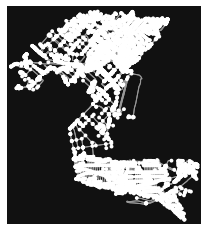

->  18720 streets in this part
->  6145 nodes for this part
->  1215.2551679999935 kilometers minimum
Sub part of city n°2


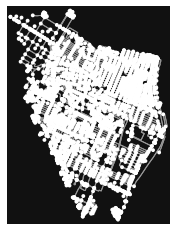

->  11940 streets in this part
->  3772 nodes for this part
->  977.5424419999991 kilometers minimum
Sub part of city n°3


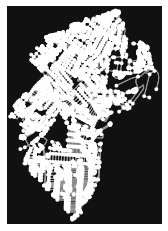

->  13504 streets in this part
->  4318 nodes for this part
->  721.174020000003 kilometers minimum
Sub part of city n°4


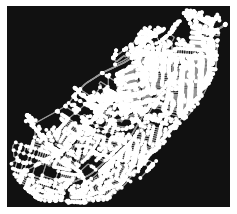

->  17500 streets in this part
->  5675 nodes for this part
->  1181.3032099999987 kilometers minimum
Sub part of city n°5


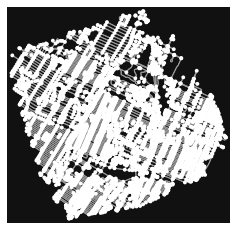

->  16354 streets in this part
->  5226 nodes for this part
->  1088.3603619999813 kilometers minimum
Sub part of city n°6


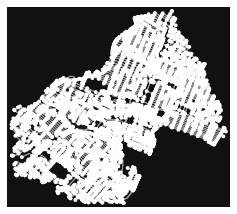

->  22150 streets in this part
->  7118 nodes for this part
->  1480.0403940000149 kilometers minimum
Sub part of city n°7


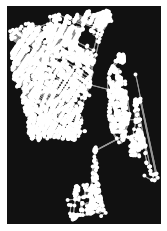

->  12110 streets in this part
->  3976 nodes for this part
->  670.8257119999972 kilometers minimum
Sub part of city n°8


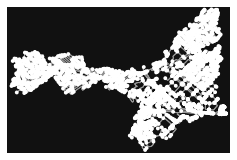

->  10688 streets in this part
->  3605 nodes for this part
->  827.4324799999952 kilometers minimum
Sub part of city n°9


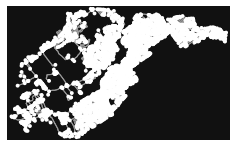

->  11044 streets in this part
->  3890 nodes for this part
->  1042.6901860000062 kilometers minimum
Sub part of city n°10


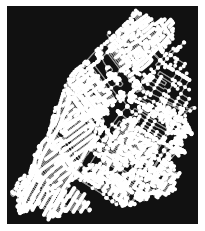

->  13100 streets in this part
->  4178 nodes for this part
->  1328.2760399999897 kilometers minimum
Sub part of city n°11


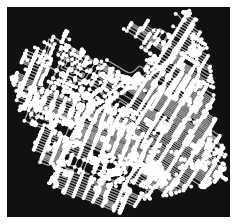

->  13448 streets in this part
->  4188 nodes for this part
->  973.9333120000003 kilometers minimum
Sub part of city n°12


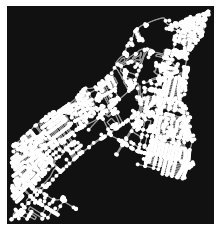

->  8194 streets in this part
->  2680 nodes for this part
->  917.864847999997 kilometers minimum
Sub part of city n°13


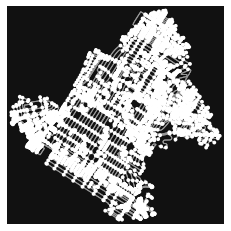

->  13616 streets in this part
->  4423 nodes for this part
->  724.7752379999969 kilometers minimum
Sub part of city n°14


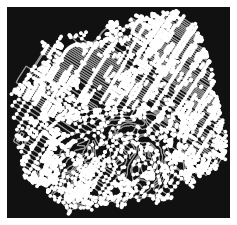

->  12992 streets in this part
->  4201 nodes for this part
->  757.9303180000005 kilometers minimum
Sub part of city n°15


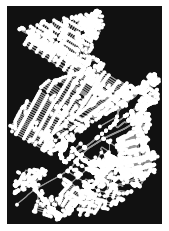

->  17816 streets in this part
->  5698 nodes for this part
->  1109.4512560000019 kilometers minimum


In [15]:
for i, GG in enumerate(GRAPHS_LIST):
    print("Sub part of city n°%d" % (i + 1))
    ox.plot_graph(GG, figsize=(4,4))
    print("-> ", len(GG.edges), "streets in this part")
    print("-> ", len(GG.nodes), "nodes for this part")
    lenght = ox.stats.edge_length_total(GG)
    print("-> " , lenght/1000, "kilometers minimum")




On remarque que certaine partie ce superposent c'est dût au fait qu' on ait créé 15 sous parties de la ville a la volé pour la demonstration en partant du principe qu'on disposait de 15 drones. Cependant la mairie peut faire son propre découpage manuellement pour modifier et/ou ajouter des sous partie et recalculer les chemins Euleriens de chaque sous graphe. Il suffirat de relancer l'algorithme


Nb: Temps estimé de calcul pour 15 sous-parties ~= 60min.
    Plus il y'a de sous-parties plus le calcul total est rapide.
    

In [16]:
### - - - Ce block correspond au code qui va definir les différentes fonctions qui vont -
#         - nous permettrent de manipuler les graphes pour les adpater a nos algos de la partie "démo"

### Construction d'une liste de noeud qui a notre format
def to_graph_city(GG):
    node_list = list(GG.edges(data=True))
    graph_city = []
    for node in node_list:
        n1 = node[0]
        n2 = node[1]
        dist = node[2]["length"]
        graph_city.append((n1,n2,dist))
    return graph_city

### On ne peut pas utiliser l'id des noeuds pour utiliser nos algos.
### On doit construire une table de correspondance entre l'id des noeuds et des numéros croissants de noeuds

CORRESPONDENCE_TABLE = {}
CORRESPONDENCE_TABLE_PRIME = {}

def get_true_node(soft_id):
    if soft_id in CORRESPONDENCE_TABLE_PRIME:
        return CORRESPONDENCE_TABLE_PRIME[soft_id]
    return -1

def to_soft_id_graph(graph_city):
    global CORRESPONDENCE_TABLE_PRIME
    global CORRESPONDENCE_TABLE
    
    CORRESPONDENCE_TABLE_PRIME = {}
    CORRESPONDENCE_TABLE = {}
    
    graph_city_soft_id = []
    soft_id = 1
    
    len_g = len(graph_city)
    index = 1
    
    old_percentage = -1
    for (node1,node2,dist) in graph_city:
        if node1 not in  CORRESPONDENCE_TABLE:
            CORRESPONDENCE_TABLE[node1] = soft_id
            CORRESPONDENCE_TABLE_PRIME[soft_id] = node1
            soft_id += 1
            
        if node2 not in  CORRESPONDENCE_TABLE:
            CORRESPONDENCE_TABLE[node2] = soft_id
            CORRESPONDENCE_TABLE_PRIME[soft_id] = node2
            
            soft_id += 1
        s_id1 = CORRESPONDENCE_TABLE[node1]
        s_id2 = CORRESPONDENCE_TABLE[node2]
        graph_city_soft_id.append((s_id1,s_id2, dist))
    return graph_city_soft_id

def to_real_id_graph(graph_city_soft_id):
    graph_city = []
    soft_id = 1
    for (node1,node2,dist) in graph_city_soft_id:
        n_id1 = get_true_node(node1)
        n_id2 = get_true_node(node2)
    
        graph_city.append((n_id1,n_id2, dist))
    return graph_city

def to_real_id_path(path_soft_id):
    path = []
    soft_id = 1
    for (node1,node2) in path_soft_id:
        n_id1 = get_true_node(node1)
        n_id2 = get_true_node(node2)
    
        path.append(n_id1)
    return path

### Calcul du parcours le plus efficace pour le drone ###

In [17]:
import sys
sys.path.append('./scripts')

import eulerian_transform as eulerian #cf nos scripts dans le dossier ./scripts/
import importlib
out = importlib.reload(eulerian) #Reload en cas de modifications des scripts

In [18]:
#- - - Importation d'une anciene liste de chemins préalablement sauvegardée
importlib.reload(sys)
sys.path.append('./old_paths')
from BACKUP_DRONES_EULERIANS_PATHS import *
# La variable FULL_ROUTES_BAK correspond a la liste des derniers chemins euleriens calculés

### Calcul des chemins Eulerien:

En lançant l'algorithme si dessous, vous calculer les chemins Euleriens de chaque sous-parties définies plus haut.

Nb: Si vous voulez utiliser les chemins préalablement calculés (BACKUP_DRONES_EULERIANS_PATHS), vous pouvez passer le block ci-dessous

In [19]:
### - - - Calcul des chemins Euleriens, temps estimé pour 15 sous-graphes ~= 60 min
### - - - Nb: passer cette étape si vous voulez utiliser les chemins sauvegardés

PREDEF_COLORS = ["red", "yellow", "green", "cyan", "purple", "blue","pink", "brown", "white", "magenta", "orange", "#AAA003", "#A01DD3","#10ABB1", "#A01D11"] #TODO: ADD MORE

ROUTES = []
COLORS = []
for i, GG in enumerate(GRAPHS_LIST):
    print("\n[!] Dealing with sub part of city n°%d" % (i + 1))
    COLORS.append(PREDEF_COLORS[i])
    
    graph_city_2 = to_graph_city(GG)
    graph_city_soft_id_2 = to_soft_id_graph(graph_city_2)
    graph_city_2_prime = to_real_id_graph(graph_city_soft_id_2)
    print("[*] Conversion, re-conversion of graphs: ", ("Erreur","OK")[graph_city_2 == graph_city_2_prime])

    path2 = eulerian.transform_and_find_eulerian_path(graph_city_soft_id_2)
    path_real_id_2 = to_real_id_path(path2)
    ROUTES.append(path_real_id_2)


[!] Dealing with sub part of city n°1
[*] Conversion, re-conversion of graphs:  OK
[*] fixing the Graph
[+] Graph fixed
[*] Graph to dict
[*] Starting Fleury
[*] Compute Eulerian path: 100 % 
[+] Euleriand Path Found !

[!] Dealing with sub part of city n°2
[*] Conversion, re-conversion of graphs:  OK
[*] fixing the Graph
[+] Graph fixed
[*] Graph to dict
[*] Starting Fleury
[*] Compute Eulerian path: 100 % 
[+] Euleriand Path Found !

[!] Dealing with sub part of city n°3
[*] Conversion, re-conversion of graphs:  OK
[*] fixing the Graph
[+] Graph fixed
[*] Graph to dict
[*] Starting Fleury
[*] Compute Eulerian path: 100 % 
[+] Euleriand Path Found !

[!] Dealing with sub part of city n°4
[*] Conversion, re-conversion of graphs:  OK
[*] fixing the Graph
[+] Graph fixed
[*] Graph to dict
[*] Starting Fleury
[*] Compute Eulerian path: 100 % 
[+] Euleriand Path Found !

[!] Dealing with sub part of city n°5
[*] Conversion, re-conversion of graphs:  OK
[*] fixing the Graph
[+] Graph fixed

In [5]:
#### Block dédié à la modification des chemins (inutiles en cas d'utilisation normal)

# - - - Ajout d'une route
#CP_R = [C,L,F,D,G_z,I,Ile,B,A,K,J,M,Donut,mid] + [ROUTES[-1]]



# - - -  Test Modification/Amelioratin d'une Route
#       0 1 2 3 4   5 6   7 8 9 a b c      d   e
#CP_R = [C,L,F,D,G_z,I,Ile,B,A,K,J,M,Donut,mid,orel_zone] + [] # copy
#CP_R[0x?] = ROUTES[0] #numero approprié de modification


#- - Si c'est concluant: decomenter les lignes necessaires
#FULL_ROUTES_BAK = CP_R
#(C,L,F,D,G_z,I,Ile,B,A,K,J,M,Donut, mid, orel_zone) = FULL_ROUTES_BAK


#- - On sauvegarde si les parcours nous conviennent
#FULL_ROUTES_BAK = ROUTES

Pour la partie suivante, veuillez decommenter l'utilisation que vous avez choisie

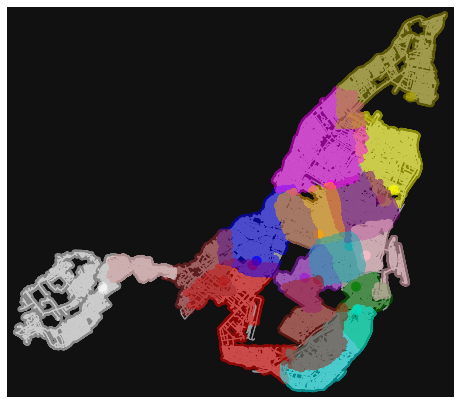

In [23]:
#- - - Ecriture dans un script python, le tableau qui contient tous les parcours des drones de chaque sous partie.
#FULL_ROUTES_BAK = ROUTES
#open("old_paths/BACKUP_DRONES_EULERIANS_PATHS.py", "w").write("FULL_ROUTES_BAK = " + str(FULL_ROUTES_BAK))


# - - Affichage du graphe avec les différents parcours des drones (décomentez l'utilisation qui vous interesse)
#fig, ax = ox.plot_graph_routes(G, ROUTES, route_colors=COLORS, route_linewidth=6, node_size=0)

# - - Affichage du graphe avec la liste des chemins déja calculés et sauvegardés
fig, ax = ox.plot_graph_routes(G, FULL_ROUTES_BAK, route_colors=PREDEF_COLORS, route_linewidth=6, node_size=0)

### Resultats:
Vous pouvez trouver les différents chemins a emprunter par le drone dans la variable ROUTES (ou FULL_ROUTES_BAK si vous avez chargé les chemins sauvegardés)

In [27]:
# - - - Pour voir les chemins:
#print(ROUTES)
#print(FULL_ROUTES_BAK)